# Choice 5: Mobile Phone (Daniel Lee, Haoyu Lu)

Title: Classifying Price Range of Mobile Phone Based on Specifications

# Exploratory Data Analysis (EDA)

## Task 0 - Initialize 

import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read csv file 

In [2]:
mobile_df = pd.read_csv('mobile_data.csv')

In [3]:
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Task 0b - Data Cleaning

Data with Nan (empty values) should be removed

In [4]:
mobile_df = mobile_df.dropna()

Screen_width or Screen_height cannot be 0cm

In [5]:
mobile_df = mobile_df[mobile_df.sc_h != 0]
mobile_df = mobile_df[mobile_df.sc_w != 0]
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,...,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,...,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143,0.760989,0.507692,0.513187,1.509341
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,...,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951,0.426597,0.500078,0.499963,1.119285
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,...,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,...,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Detect outliers by using boxplots

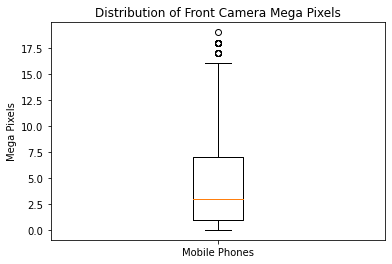

In [6]:
#outlier in fc
fc_col = mobile_df.loc[:, 'fc']
plt.boxplot(fc_col)
plt.xticks([1], ['Mobile Phones'])
plt.ylabel('Mega Pixels')
plt.title('Distribution of Front Camera Mega Pixels')
plt.show()

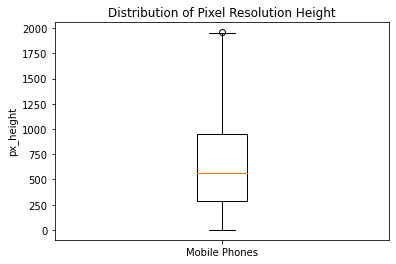

In [7]:
#outlier in px_height
px_height_col = mobile_df.loc[:, 'px_height']
plt.boxplot(px_height_col)
plt.xticks([1], ['Mobile Phones'])
plt.ylabel('px_height')
plt.title('Distribution of Pixel Resolution Height')
plt.show()

Eliminate outliers using IQR method

In [8]:
IQR = mobile_df.quantile(0.75) - mobile_df.quantile(0.25) #Q3 - Q1
LB = mobile_df.quantile(0.25) - 3 * IQR # lower bound
UB = mobile_df.quantile(0.75) + 3 * IQR # Upper bound

In [9]:
mobile_df_out = mobile_df
mobile_df_out = mobile_df_out[mobile_df_out.fc >= LB.fc]
mobile_df_out = mobile_df_out[mobile_df_out.fc <= UB.fc]

mobile_df_out = mobile_df_out[mobile_df_out.px_height >= LB.px_height]
mobile_df_out = mobile_df_out[mobile_df_out.px_height <= UB.px_height]

mobile_df = mobile_df_out

## Task 0c - Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X = mobile_df.iloc[:, :-1].values
y = mobile_df.loc[:, ['price_range']].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
mobile_train_df = pd.DataFrame(data=X_train, columns = mobile_df.columns[:-1])
mobile_train_df['price_range'] = y_train.astype('float64')

# mobile_df is training data
mobile_df = mobile_train_df 

## Task 1 - Examine Distributions 

### Clock Speed Line Graph

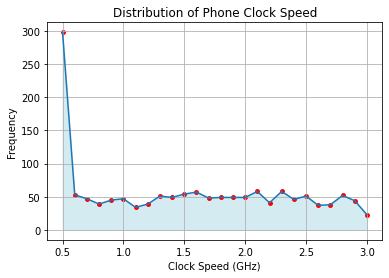

In [13]:
clk_speed_freq = mobile_df.groupby(['clock_speed']).size()
clk_speed_freq_tabluar = clk_speed_freq.reset_index()
clk_speed_freq_tabluar.columns = ['clock_speed','freq']
clk_speed_col  = clk_speed_freq_tabluar['clock_speed']
clk_speed_freq = clk_speed_freq_tabluar['freq']

plt.plot(clk_speed_col, clk_speed_freq)
plt.fill_between(clk_speed_col, clk_speed_freq, color="lightblue", alpha=0.5)
plt.scatter(clk_speed_col, clk_speed_freq, s=15, color="red")

plt.grid()
plt.title('Distribution of Phone Clock Speed')
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Frequency')
plt.show()

Most of the phones have clock speed in the range of 0.5 GHz and have uniform distribution in the range of 1.0 GHz to 3.0 GHz.

###  Battery Power Histogram

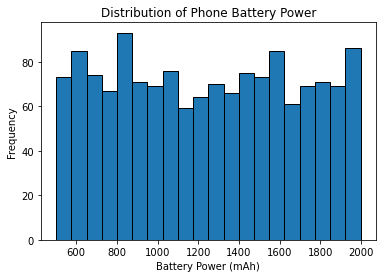

In [14]:
bp_col = mobile_df.loc[:, 'battery_power']
plt.hist(bp_col, 20, edgecolor='black', linewidth=1)
plt.title('Distribution of Phone Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()

The distribution of battery power is uniform for the whole range of batter power.

### Dimensions of Phone in Scatterplot

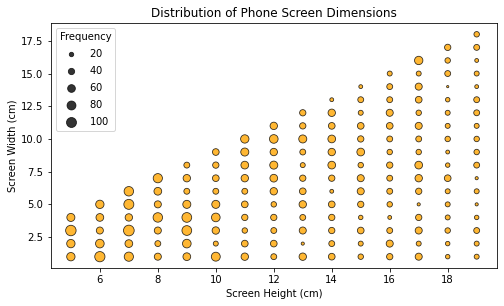

In [15]:
sc_hw_freq = mobile_df.groupby(['sc_h','sc_w']).size()
sc_hw_freq_tabluar = sc_hw_freq.reset_index()
sc_hw_freq_tabluar.columns = ['sc_h','sc_w','freq']
sc_h = sc_hw_freq_tabluar['sc_h']
sc_w = sc_hw_freq_tabluar['sc_w']
sc_freq = sc_hw_freq_tabluar['freq']
plt.figure(figsize=(8,4.5))
sc = plt.scatter(sc_h, sc_w, s=sc_freq*5, edgecolor='black', linewidth=0.8, color = 'orange', alpha=0.8)
plt.title('Distribution of Phone Screen Dimensions')
plt.xlabel('Screen Height (cm)')
plt.ylabel('Screen Width (cm)')

plt.legend(*sc.legend_elements("sizes", num=6), title='Frequency')

plt.show()

The graph shows the scatterplot of the data by the physical dimensions of the screen.
The frequency is shown by the size of each point where higher the frequency is the larger size and vice versa. 
Most of the dimensions of the phones are small as most of the large points are on the bottom left corner and as the sizes increase the frequency decreases as points get smaller.

### Touchscreen in Pie Graph




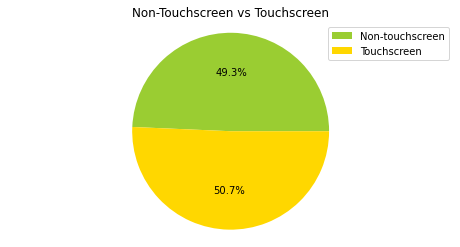

In [16]:
touchsreen_data = [len(mobile_df.loc[(mobile_df.touch_screen == 0)]), len(mobile_df.loc[(mobile_df.touch_screen == 1)])]


fig, ax = plt.subplots(figsize = (8,4))
title = 'Non-Touchscreen vs Touchscreen'
colors = 'yellowgreen', 'gold'
labels = 'Non-touchscreen', 'Touchscreen'

ax.pie(touchsreen_data,colors=colors,autopct='%1.1f%%')
ax.set_title(title)
ax.axis('equal')
ax.legend(labels)

plt.show()

The distribution of Touch screen is almost 50-50.

### Ram in Horizontal Bar Graph

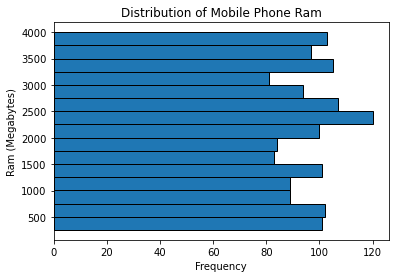

In [17]:
ram_col = mobile_df.loc[:, 'ram']
plt.hist(ram_col, 15, edgecolor='black', linewidth=1, orientation=u'horizontal')
plt.title('Distribution of Mobile Phone Ram')
plt.xlabel('Frequency')
plt.ylabel('Ram (Megabytes)')
plt.show()

The distribution of RAM is uniform.

### Weight in boxplot

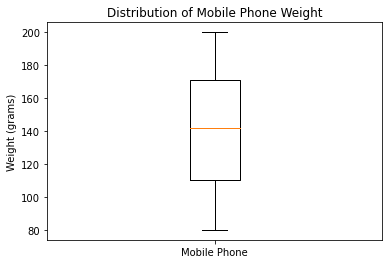

In [18]:
wt_col = mobile_df.loc[:, 'mobile_wt']

plt.boxplot(wt_col)
plt.ylabel('Weight (grams)')
plt.xticks([1], ['Mobile Phone'])
plt.title('Distribution of Mobile Phone Weight')
plt.show()

The distribution of weight shows no outliner.

## Task 2 - Distribution Against Price Range

### Clock Speed vs Price Range

In [19]:
clk_speed_freq = mobile_df.groupby(['clock_speed','price_range']).size()
clk_speed_freq_tabluar = clk_speed_freq.reset_index()
clk_speed_freq_tabluar.columns = ['clock_speed','price_range','freq']
clk_speed_freq_tabluar.set_index(['price_range'],inplace=True)

clk_speed_col  = clk_speed_freq_tabluar['clock_speed']
clk_speed_freq = clk_speed_freq_tabluar['freq']

p0 = clk_speed_freq_tabluar.loc[0]['freq']
p1 = clk_speed_freq_tabluar.loc[1]['freq']
p2 = clk_speed_freq_tabluar.loc[2]['freq']
p3 = clk_speed_freq_tabluar.loc[3]['freq']
x  = clk_speed_freq_tabluar.loc[0]['clock_speed']

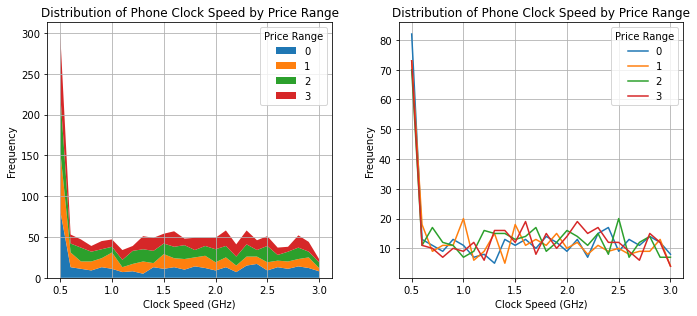

In [20]:
plt.figure(figsize=(10,4.5))

plt.subplot(121)
plt.stackplot(x, p0, p1, p2, p3, labels=[0,1,2,3])
plt.grid()
plt.legend(loc='upper right', title='Price Range')
plt.title('Distribution of Phone Clock Speed by Price Range')
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Frequency')

plt.subplot(122)
plt.plot(x, p0, label='0')
plt.plot(x, p1, label='1')
plt.plot(x, p2, label='2')
plt.plot(x, p3, label='3')

plt.legend(loc='upper right', title='Price Range')

plt.grid()
plt.title('Distribution of Phone Clock Speed by Price Range')
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

On the left, the area plot is shown to give a different perspective of the previous frequency line plot of phone clock speeds. When individual price ranges are plotted separately (shown on the right), the distribution of clock speeds by price ranges are very identical to one another as their frequency overlaps with each other. 

###  Battery Power vs Price Range Histogram

In [21]:
battery_price = mobile_df.loc[ :, ['battery_power','price_range']]
battery_price.set_index(['price_range'], inplace=True)
bp0 = np.squeeze(battery_price.loc[0].values)
bp1 = np.squeeze(battery_price.loc[1].values)
bp2 = np.squeeze(battery_price.loc[2].values)
bp3 = np.squeeze(battery_price.loc[3].values)

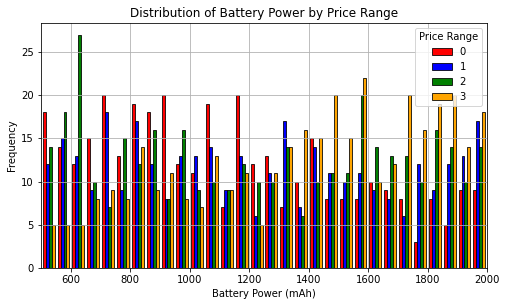

In [22]:
bins = 30
plt.figure(figsize=(8,4.5))
plt.hist([bp0,bp1,bp2,bp3], 
         bins, 
         #stacked=True,
         color=["red", "blue", "green", "orange"], 
         #density = True,
         edgecolor='black',
         linewidth=0.8,
         label = ["0", "1", "2", "3"])
plt.title('Distribution of Battery Power by Price Range')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(500,2000)
plt.legend(loc="upper right", title='Price Range')
plt.show()

From visualizing the graph higher price range cellphones tend to have a higher battery power range. From the graph, more price ranges of 3 and 2 which are color-coded in yellow and green are on the right side of the graph. While the price range of 0 and 1 are on the left.

#### Separated Into Price Range

Text(0, 0.5, 'Frequency')

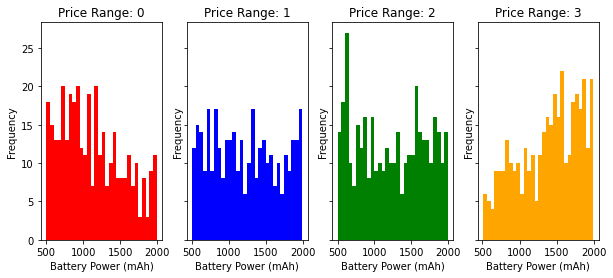

In [23]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,4))

axs[0].hist(bp0, bins=30, color="red")
axs[1].hist(bp1, bins=30, color="blue")
axs[2].hist(bp2, bins=30, color="green")
axs[3].hist(bp3, bins=30, color="orange")

axs[0].title.set_text('Price Range: 0')
axs[1].title.set_text('Price Range: 1')
axs[2].title.set_text('Price Range: 2')
axs[3].title.set_text('Price Range: 3')

axs[0].set_xlabel('Battery Power (mAh)')
axs[1].set_xlabel('Battery Power (mAh)')
axs[2].set_xlabel('Battery Power (mAh)')
axs[3].set_xlabel('Battery Power (mAh)')

axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[2].set_ylabel('Frequency')
axs[3].set_ylabel('Frequency')

For better visualization, the data has been split into price ranges. From here one can see that price range 0 has a lower battery range while price range 3 has a higher battery range.

### Dimension vs Price Range

In [24]:
sc_hw_freq = mobile_df.groupby(['sc_h','sc_w','price_range']).size()
sc_hw_freq_tabluar = sc_hw_freq.reset_index()
sc_hw_freq_tabluar.columns = ['sc_h','sc_w','price_range','freq']
sc_hw_freq_tabluar.set_index(['price_range'], inplace=True)

In [25]:
sc0 = np.squeeze(sc_hw_freq_tabluar.loc[0])
sc1 = np.squeeze(sc_hw_freq_tabluar.loc[1])
sc2 = np.squeeze(sc_hw_freq_tabluar.loc[2])
sc3 = np.squeeze(sc_hw_freq_tabluar.loc[3])

<Figure size 576x324 with 0 Axes>

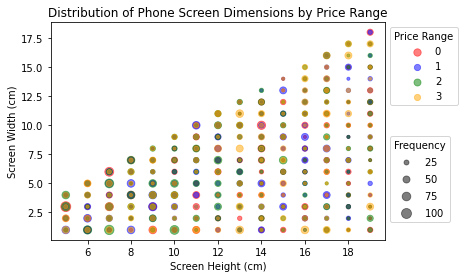

In [26]:
plt.figure(figsize=(8,4.5))

fig, ax = plt.subplots()
sc = plt.scatter(sc0.sc_h.values, sc0.sc_w.values, s=sc0.freq.values*10, linewidth=0.8, color = 'red', alpha=0.5, label='0')
plt.scatter(sc1.sc_h.values, sc1.sc_w.values, s=sc1.freq.values*10, linewidth=0.8, color = 'blue', alpha=0.5, label='1')
plt.scatter(sc2.sc_h.values, sc2.sc_w.values, s=sc2.freq.values*10, linewidth=0.8, color = 'green', alpha=0.5, label='2')
plt.scatter(sc3.sc_h.values, sc3.sc_w.values, s=sc3.freq.values*10, linewidth=0.8, color = 'orange', alpha=0.5, label='3')
plt.title('Distribution of Phone Screen Dimensions by Price Range')
plt.xlabel('Screen Height (cm)')
plt.ylabel('Screen Width (cm)')

l1 = plt.legend(bbox_to_anchor=(1, 1), title='Price Range')
ax.add_artist(l1)
plt.legend(*sc.legend_elements("sizes", num=4), bbox_to_anchor=(1, 0.5), title='Frequency')

plt.show()

The graph above shows the layered distribution of phone screen dimensions by price ranges. From the visualization, the darker the point is, the more frequent that size is for all categories of phones by price range. On the graph, the bottom left corner is the darkest which indicates a high frequency of phones is small screens. 

#### Separated Into Price Range

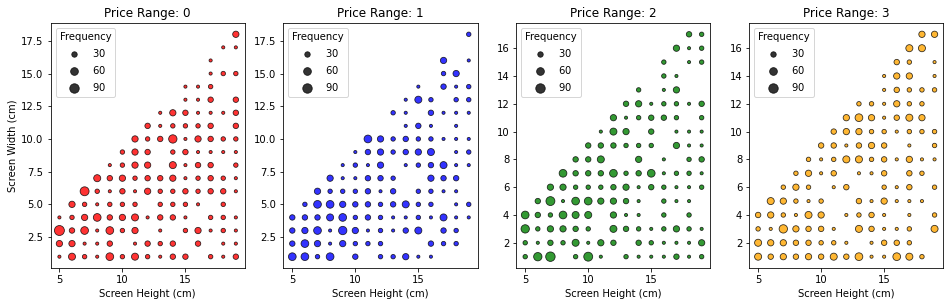

In [27]:
plt.figure(figsize=(16,4.5))
plt.subplot(141)
sc = plt.scatter(sc0.sc_h.values, sc0.sc_w.values, s=sc0.freq.values*10, edgecolor='black', linewidth=0.8, color = 'red', alpha=0.8)
plt.legend(*sc.legend_elements("sizes", num=3), loc='upper left', title='Frequency')
plt.xlabel('Screen Height (cm)')
plt.ylabel('Screen Width (cm)')
plt.title('Price Range: 0')
plt.subplot(142)
plt.scatter(sc1.sc_h.values, sc1.sc_w.values, s=sc1.freq.values*10, edgecolor='black', linewidth=0.8, color = 'blue', alpha=0.8)
plt.legend(*sc.legend_elements("sizes", num=3), loc='upper left', title='Frequency')
plt.xlabel('Screen Height (cm)')
plt.title('Price Range: 1')
plt.subplot(143)
plt.scatter(sc2.sc_h.values, sc2.sc_w.values, s=sc2.freq.values*10, edgecolor='black', linewidth=0.8, color = 'green', alpha=0.8)
plt.legend(*sc.legend_elements("sizes", num=3), loc='upper left', title='Frequency')
plt.xlabel('Screen Height (cm)')
plt.title('Price Range: 2')
plt.subplot(144)
plt.scatter(sc3.sc_h.values, sc3.sc_w.values, s=sc3.freq.values*10, edgecolor='black', linewidth=0.8, color = 'orange', alpha=0.8)
plt.legend(*sc.legend_elements("sizes", num=3), loc='upper left', title='Frequency')
plt.xlabel('Screen Height (cm)')
plt.title('Price Range: 3')
plt.show()

To visualize better, the data has been split by the mobile screen dimension as well. The same conclusion can be made about the high frequency of smaller screens for most price ranges. However, from this visualization one can see that compared to price range 0 other price range has a higher frequency of larger screens.

### Touchscreen vs Price Range

In [28]:
touch_screen = mobile_df.loc[ :, ['touch_screen','price_range']]
#preview
touch_screen.head()

,touch_screen,price_range
0,1.0,2.0
1,1.0,3.0
2,1.0,2.0
3,0.0,1.0
4,0.0,2.0


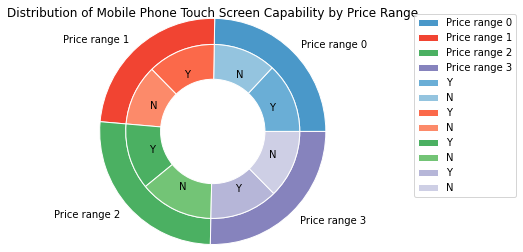

In [29]:
group_names=['Price range 0', 'Price range 1', 'Price range 2', 'Price range 3']

group_size = [len(touch_screen.loc[touch_screen.price_range == 0]), 
              len(touch_screen.loc[touch_screen.price_range == 1]), 
              len(touch_screen.loc[touch_screen.price_range == 2]), 
              len(touch_screen.loc[touch_screen.price_range == 3]) 
             ]

subgroup_names=['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N']

subgroup_size=[len(touch_screen.loc[(touch_screen.touch_screen == 1) & (touch_screen.price_range == 0)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 0) & (touch_screen.price_range == 0)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 1) & (touch_screen.price_range == 1)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 0) & (touch_screen.price_range == 1)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 1) & (touch_screen.price_range == 2)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 0) & (touch_screen.price_range == 2)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 1) & (touch_screen.price_range == 3)]),
               len(touch_screen.loc[(touch_screen.touch_screen == 0) & (touch_screen.price_range == 3)])
              ]



fig, ax = plt.subplots()

colors =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Outer
outter, _ = ax.pie(group_size,
                   radius=1.3, labels=group_names, colors= 
[colors[0](0.6), colors[1](0.6), colors[2](0.6), colors[3](0.6)] )
plt.setp(outter, width=0.3, edgecolor='white')
ax.axis('equal')

# Inner
inner, _ = ax.pie(subgroup_size, 
                  radius=1.3-0.3, 
labels=subgroup_names, labeldistance=0.7, colors=[colors[0](0.5), colors[0](0.4),
                                                  colors[1](0.5), colors[1](0.4), 
                                                  colors[2](0.6), colors[2](0.5), 
                                                  colors[3](0.4), colors[3](0.3)])
plt.setp(inner, width=0.4, edgecolor='white')




handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, loc=(1.1, 0.2))

plt.title("Distribution of Mobile Phone Touch Screen Capability by Price Range")
plt.show()

All price ranges have roughly the same ratio of Touchscreen phone and Non-touchscreen phone.

### RAM vs Price Range

In [30]:
ram = mobile_df.loc[ :, ['ram','price_range']]
ram.set_index(['price_range'], inplace=True)
r0 = np.squeeze(ram.loc[0].values)
r1 = np.squeeze(ram.loc[1].values)
r2 = np.squeeze(ram.loc[2].values)
r3 = np.squeeze(ram.loc[3].values)

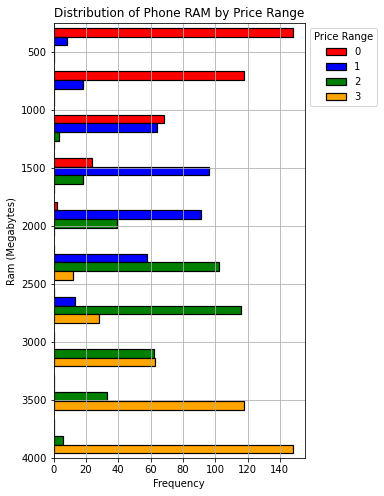

In [31]:
bins = 10
plt.figure(figsize=(4.5,8))
plt.hist([r0,r1,r2,r3], 
         bins, 
         #stacked=True,
         color=["red", "blue", "green", "orange"], 
         #density = True,
         edgecolor='black',
         linewidth=1.2,
         label = ["0", "1", "2", "3"],
         orientation=u'horizontal'
         )

plt.grid(True)
plt.ylim(4000,250)
plt.title('Distribution of Phone RAM by Price Range')
plt.xlabel('Frequency')
plt.ylabel('Ram (Megabytes)')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')

plt.show()

Tends to have more price range cellphones on the higher RAM range. From the graph, the price range of 3(yellow) is mostly on the bottom. While the price range of 1(blue) and 2(green) are in the middle, and 0(red) is on the top.

#### Separated Into Price Range

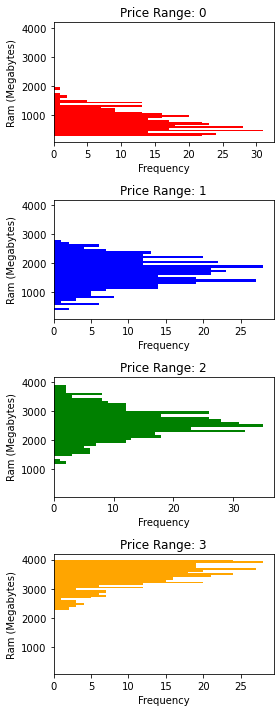

In [32]:
fig, axs = plt.subplots(4, 1, sharey=True, tight_layout=True, figsize=(4,10))

axs[0].hist(r0, orientation=u'horizontal', bins=30, color="red")
axs[1].hist(r1, orientation=u'horizontal', bins=30, color="blue")
axs[2].hist(r2, orientation=u'horizontal', bins=30, color="green")
axs[3].hist(r3, orientation=u'horizontal', bins=30, color="orange")

axs[0].title.set_text('Price Range: 0')
axs[1].title.set_text('Price Range: 1')
axs[2].title.set_text('Price Range: 2')
axs[3].title.set_text('Price Range: 3')

axs[0].set_xlabel('Frequency')
axs[1].set_xlabel('Frequency')
axs[2].set_xlabel('Frequency')
axs[3].set_xlabel('Frequency')

axs[0].set_ylabel('Ram (Megabytes)')
axs[1].set_ylabel('Ram (Megabytes)')
axs[2].set_ylabel('Ram (Megabytes)')
axs[3].set_ylabel('Ram (Megabytes)')

plt.show()

Separating the graph by price range, the distribution of ram by price can be seen very clearly. While price range 1 has a lower ram range while price range 3 has a higher ram range. For price ranges 1 and 2, their range is in between, but price range 2 has a higher range by a little bit. Ram may be one of the features that have the highest correlation to the price range after visualizing the distributions.

### Weight vs Price Range

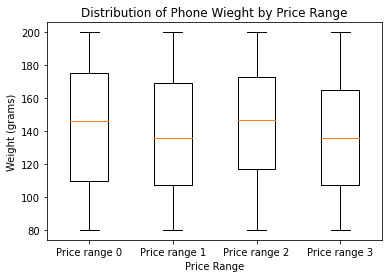

In [33]:
weight = mobile_df.loc[ :, ['mobile_wt','price_range']]
wt_data0 = weight.loc[weight['price_range']== 0, 'mobile_wt'].values
wt_data1 = weight.loc[weight['price_range']== 1, 'mobile_wt'].values
wt_data2 = weight.loc[weight['price_range']== 2, 'mobile_wt'].values
wt_data3 = weight.loc[weight['price_range']== 3, 'mobile_wt'].values
# Multiple box plots on one Axes

data = [wt_data0, wt_data1, wt_data2, wt_data3]

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xlabel('Price Range')
ax.set_ylabel('Weight (grams)')
plt.xticks([1, 2, 3, 4], ['Price range 0', 'Price range 1', 'Price range 2', 'Price range 3'])
plt.title('Distribution of Phone Wieght by Price Range')
plt.show()

From the comparsion of the box plot, most of their distributions are the same.

## Task 3 - Clustering 

### Using K-Means 

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [35]:
X = mobile_df.iloc[:, :-1] #whole data with price range
y = mobile_df.iloc[:, -1] #price range

In [36]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [37]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_num_components=2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results_pca = pd.DataFrame(reduced_data,columns=['pc1','pc2'])

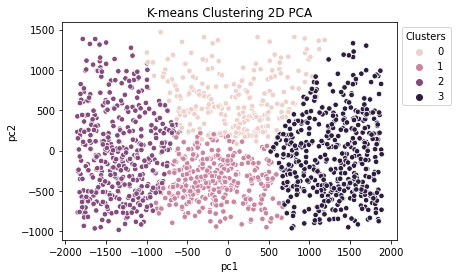

In [38]:
sns.scatterplot(x="pc1", y="pc2", hue=y_kmeans, data=results_pca,s=30)
plt.legend(bbox_to_anchor=(1, 1), title='Clusters')
plt.title('K-means Clustering 2D PCA')
plt.show()

The four clusters can be seen from the plot above. The algorithm has broken the cluster into the left, bottom, right, and top. 

### Visualizing On Three dimensional Plot

<Figure size 432x288 with 0 Axes>

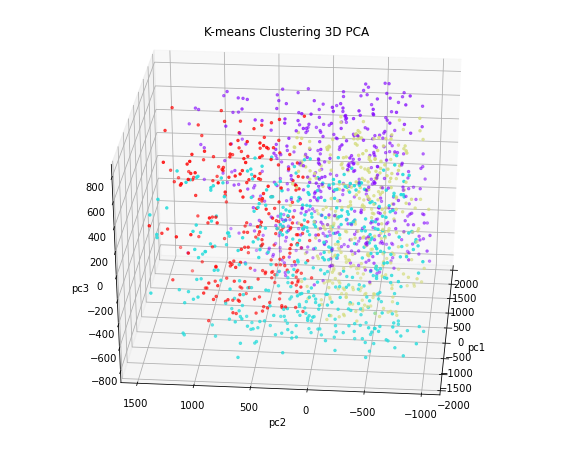

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
 
pca_num_components=3 #dimensionality 
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pc1','pc2','pc3'])

colormap = plt.get_cmap("rainbow_r")
norm = matplotlib.colors.Normalize(vmin=min(y_kmeans), vmax=max(y_kmeans))

fig = plt.figure()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results['pc1'], results['pc2'], results['pc3'], c=colormap(norm(y_kmeans)), s=6)
ax.view_init(30, 185)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.title('K-means Clustering 3D PCA')
plt.show()

All four clusters can be viewed from the three-dimensional plot above. The algorithm may have split the data mostly influenced by the PCA 1 and the PCA 2 axis. 

## Task 4 - Scatter Plot With Price Range Coloring

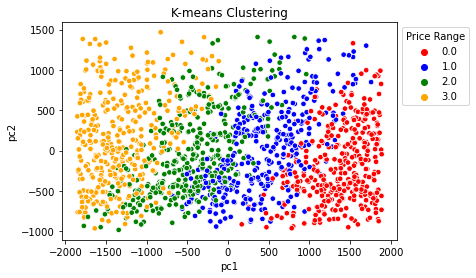

In [40]:
sns.scatterplot(x="pc1", y="pc2", hue=y.values, palette=["red", "blue", "green", "orange"], data=results_pca, s=30)
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')
plt.title('K-means Clustering')
plt.show()

Using the same PCA data for plotting K-means, the points have been color-coded with the original data. Comparing the original to the k-means' prediction, the k-means wasn't accurate with price range 1 and 2. In k-means they mix those two price ranges up, however, price range 0 and 3 were clustered similarily.

## Task 5 - Correlation Analysis

In [41]:
mobile_df.corr(method ='pearson').iloc[-1,:]

battery_power    0.197501
blue             0.040163
clock_speed      0.019525
dual_sim         0.027535
fc               0.000108
four_g           0.004748
int_memory       0.040249
m_dep           -0.015600
mobile_wt       -0.027282
n_cores         -0.016842
pc               0.020629
px_height        0.174318
px_width         0.164291
ram              0.916570
sc_h             0.021112
sc_w             0.030404
talk_time        0.023267
three_g          0.018682
touch_screen    -0.030337
wifi             0.030609
price_range      1.000000
Name: price_range, dtype: float64

    Correlation Coeffficient: (fluctuates by randomness of testing sample) 
    Ram = 0.916570
    Battery Power = 0.197501
    px_height = 0.174318
    px_width 0.164291

# Modeling and Question Answering

## Model 1: Kernel SVM Classification 

Support Vector Machine classifies data by finding the most optimal line/hyperplane given the number of features. Optimal refers to maximizing the distance between points or vectors of their classes and these selected vectors are called support vectors since the boundary that is being drawn is influenced only by them. Then there is a kernel that is helpful based on specific types of data where a line cannot be drawn to split and so kernel raises the data a dimension for a plane to be drawn.

In [42]:
# PCA the obtained X data
reduced_data = PCA(n_components=2).fit_transform(X)
results_pca = pd.DataFrame(reduced_data,columns=['pc1','pc2'])

# Split the data
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(results_pca, y, test_size = 0.2, random_state = 0)

train_results_pca = pd.DataFrame(X_train_sc,columns=['pc1','pc2'])
test_results_pca = pd.DataFrame(X_test_sc,columns=['pc1','pc2'])

In [43]:
# Fitting into SVM with kernal rbf
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_sc, y_train_sc)

SVC(random_state=0)

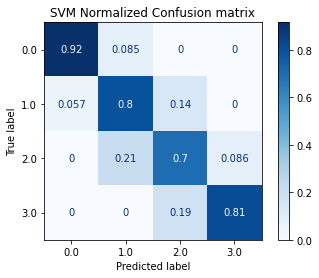

Accuracy: 0.8082191780821918


In [44]:
#Create Confusion Matrix (Normalized)

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score

np.set_printoptions(precision=2)
disp = plot_confusion_matrix(classifier, X_test_sc, y_test_sc, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('SVM Normalized Confusion matrix')
plt.show()

y_pred_sc = classifier.predict(X_test_sc)
print('Accuracy:',accuracy_score(y_test_sc, y_pred_sc))

According to the confusion matrix, most of the price ranges were predicted by the model but struggled with predicting the price range of 2, with only 70% predicted correctly. Most of the error is in predicting price range of 1 and 2 as 20% of price range 2 was misclassified as 1. This model can predict price range of 0 very well, with nearly 90% of the prices predicted correctly. In conclusion, the accuracy of the model is about 80% which performs significantly well.

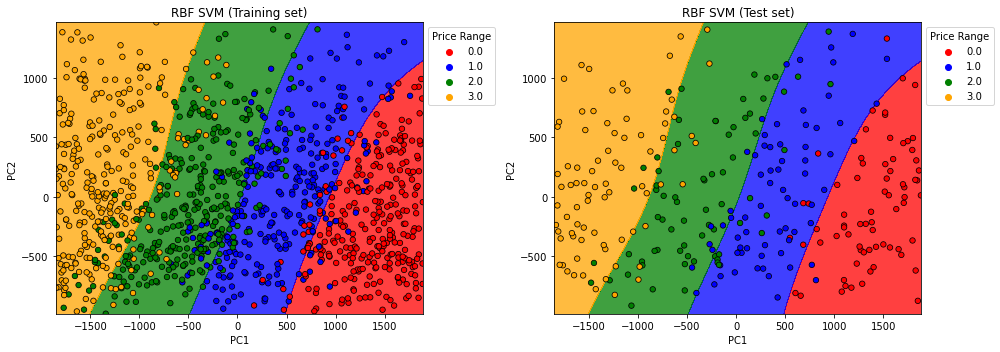

In [45]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(14,5))
plt.subplot(121)
X_set, y_set = X_train_sc.values, y_train_sc.values #need to add .values if want PCA --> split 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 2))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'blue', 'green', 'orange']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

sns.scatterplot(x="pc1", y="pc2", hue=y_train_sc.ravel(), palette=['red', 'blue', 'green', 'orange'], data=train_results_pca, s=30, edgecolor='black')

plt.title('RBF SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')

plt.subplot(122)
X_set, y_set = X_train_sc.values, y_train_sc.values #need to add .values if want PCA --> split 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 2))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'blue', 'green', 'orange']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

sns.scatterplot(x="pc1", y="pc2", hue=y_test_sc.ravel(), palette=['red', 'blue', 'green', 'orange'], data=test_results_pca, s=30, edgecolor='black')

plt.title('RBF SVM (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')
plt.tight_layout()
plt.show()

The visualization shows the boundaries that RBF SVM predicted for the 4 classes in which training and test data have been plotted over.

As seen from the visualization on the left, the model struggles to find the boundary where 2 value prices collide which indicates the model hasn't overfitted. Using the model's prediction, the test cases have been plotted on the right, which shows most of the cases are being predicted correctly as the colored points are placed in their colored boundaries.

## Model 2: Random forest

This classification algorithm uses ensemble learning which means it uses multiple other machine learning algorithms to make one big one. This algorithm uses multiple decision trees. Each decision tree finds the boundary by splitting the data into 2 where the majority of the class by the feature are grouped into based on their features. The random forest gives each tree a random set of data from the training set and combines all their classification as a vote of a boundary. And for a tree to identify this boundary is a certain class it would be based on the highest "vote" from the numerous tress classified on that specific location. 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#PCA
reduced_data = PCA(n_components=2).fit_transform(X)
results_rf = pd.DataFrame(reduced_data,columns=['pc1','pc2'])

#Split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(results_rf, y, test_size = 0.2, random_state = 0)

train_results_rf = pd.DataFrame(X_train_rf,columns=['pc1','pc2'])
test_results_rf = pd.DataFrame(X_test_rf,columns=['pc1','pc2'])

In [47]:
#train
model_name = "Random Forest Classifier"
rfc = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state=0)
rfc_model = Pipeline(steps=[('classifier', rfc)])
rfc_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rfc_model.predict(X_test_rf)

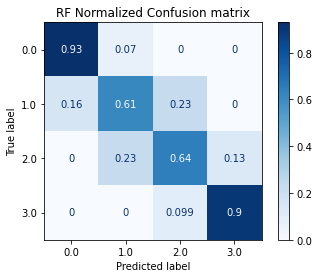

Accuracy: 0.7773972602739726


In [48]:
#confusion matrix
np.set_printoptions(precision=2)
disp = plot_confusion_matrix(rfc_model, X_test_rf, y_test_rf, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('RF Normalized Confusion matrix')
plt.show()

y_pred_rf = rfc_model.predict(X_test_rf)
print('Accuracy:',accuracy_score(y_test_rf, y_pred_rf))

Comparing the random forest confusion matrix with SVM (RBF kernel), the random forest lacks at classifying price range 1 and 2. Only 61% of price range 1 and 64% of price range 2 has been predicted correctly. While SVM had 80% and 70% respectively. Surprisingly, the random forest model was able to label price range 0 and 3 much better than SVM. However, because of a lack of accuracy for the mid-range prices, the model's total accuracy is 77%, which is worse than SVM. 

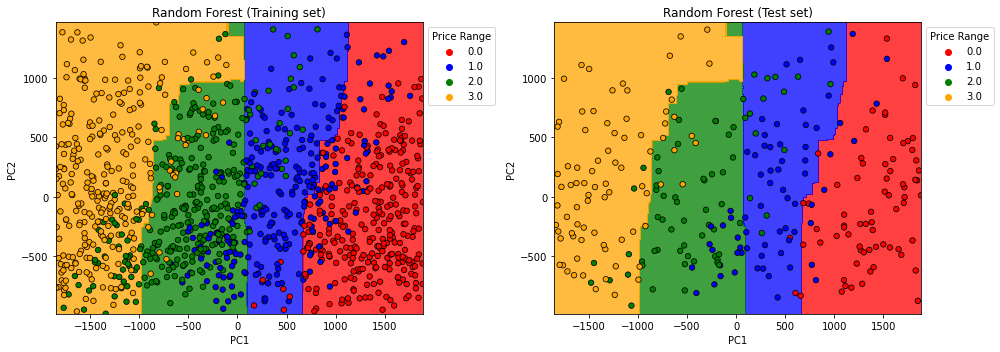

In [49]:
from matplotlib.colors import ListedColormap


plt.figure(figsize=(14,5))
plt.subplot(121)
X_set, y_set = X_train_rf.values, y_train_rf.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 2))
plt.contourf(X1, X2, rfc_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'green', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
sns.scatterplot(x="pc1", y="pc2", hue=y_train_rf.ravel(), palette=['red', 'blue', 'green', 'orange'], data=train_results_rf, s=30, edgecolor='black')
plt.title('Random Forest (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')

plt.subplot(122)
X_set, y_set = X_train_rf.values, y_train_rf.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 2))
plt.contourf(X1, X2, rfc_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'green', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
sns.scatterplot(x="pc1", y="pc2", hue=y_test_rf.ravel(), palette=['red', 'blue', 'green', 'orange'], data=test_results_rf, s=30, edgecolor='black')
plt.title('Random Forest (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')
plt.tight_layout()
plt.show()


From the visualization above, one can see the area where price range 1 and 2 are clustered around in the same area the most. The model has drawn the boundary between where the majority of price range 2 was located, by so, misses price range 1. The visualization shows why the random forest algorithm lacked accuracy in predicting price ranges 1 and 2.

## Model 3: Naive Bayes

This classification algorithm takes advantage of probability theory and Bayes’ Theorem to decide the boundary of classes.

In [50]:
#PCA
reduced_data = PCA(n_components=2).fit_transform(X)
results_nb = pd.DataFrame(reduced_data,columns=['pc1','pc2'])

#Split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(results_nb, y, test_size = 0.2, random_state = 0)

train_results_nb = pd.DataFrame(X_train_nb,columns=['pc1','pc2'])
test_results_nb = pd.DataFrame(X_test_nb,columns=['pc1','pc2'])

In [51]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
nm_model = GaussianNB()
nm_model.fit(X_train_nb, y_train_nb)

GaussianNB()

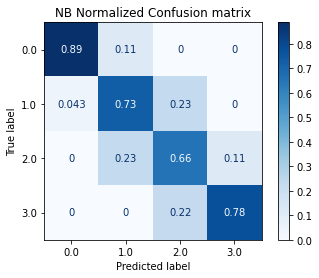

Accuracy: 0.7636986301369864


In [52]:
#confusion matrix
np.set_printoptions(precision=2)
disp = plot_confusion_matrix(nm_model, X_test_nb, y_test_nb, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('NB Normalized Confusion matrix')
plt.show()

y_pred_nb = nm_model.predict(X_test_nb)
print('Accuracy:',accuracy_score(y_test_nb, y_pred_nb))

Comparing Gaussian Naive Bayes (GNB) confusion matrix to previous models, this model has the worse performance. Eventhough GNB can predict a similar proportion of price range 0 as other models, it is not accurate for other 3 classes. The predication accuracy is mediocre for most labeling and this this knowledge GNB has the lowest accuracy of 76%.

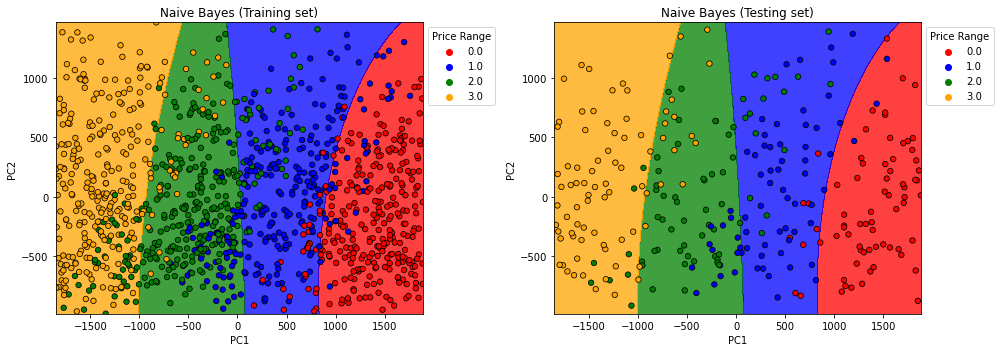

In [53]:
plt.figure(figsize=(14,5))
plt.subplot(121)
X_set, y_set = X_train_nb.values, y_train_nb.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 2))
plt.contourf(X1, X2, nm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'green', 'orange')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

sns.scatterplot(x="pc1", y="pc2", hue=y_train_nb.ravel(), 
                palette=['red', 'blue', 'green', 'orange'], data=train_results_nb, s=30, edgecolor='black')

plt.title('Naive Bayes (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')

plt.subplot(122)
X_set, y_set = X_train_nb.values, y_train_nb.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 2))
plt.contourf(X1, X2, nm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'green', 'orange')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

sns.scatterplot(x="pc1", y="pc2", hue=y_test_nb.ravel(), 
                palette=['red', 'blue', 'green', 'orange'], data=test_results_nb, s=30, edgecolor='black')

plt.title('Naive Bayes (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1, 1), title='Price Range')
plt.tight_layout()
plt.show()

Similar to the Random Forest tree, GNB struggles with the boundaries of price range 1 and 2. Furthermore, the boundary of price range 0 to 2 isn't able to capture all their classes while mislabeling most of them as neighbors as theirs.  

## Conclusion

In conclusion, the SVM model with RBF kernel is the best classifier algorithm compared to the models that we explored with an accuracy of 80%. SVM had the least misclassification errors where others had much more. All of the algorithms had a conundrum of placing a boundary between price range 1 and 2 as their points were clustered together. Furthermore, most of them performed within the extremes price ranges (0, 3). 